## Plotting Real-time Data from Citibike

We will now use the Citibike API in combination with Pandas, in order to create a real-time view of the Citibike stations in New York.

The API call at http://www.citibikenyc.com/stations/json gives us a real-time view of the Citibike stations in New York.

In [1]:
# Plotting setup

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 20)
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

In [2]:
import requests
url = 'http://www.citibikenyc.com/stations/json'
data = requests.get(url).json()
data

{'executionTime': '2017-05-20 03:43:15 PM',
 'stationBeanList': [{'altitude': '',
   'availableBikes': 9,
   'availableDocks': 30,
   'city': '',
   'id': 72,
   'landMark': '',
   'lastCommunicationTime': '2017-05-20 03:41:45 PM',
   'latitude': 40.76727216,
   'location': '',
   'longitude': -73.99392888,
   'postalCode': '',
   'stAddress1': 'W 52 St & 11 Ave',
   'stAddress2': '',
   'stationName': 'W 52 St & 11 Ave',
   'statusKey': 1,
   'statusValue': 'In Service',
   'testStation': False,
   'totalDocks': 39},
  {'altitude': '',
   'availableBikes': 2,
   'availableDocks': 30,
   'city': '',
   'id': 79,
   'landMark': '',
   'lastCommunicationTime': '2017-05-20 03:41:24 PM',
   'latitude': 40.71911552,
   'location': '',
   'longitude': -74.00666661,
   'postalCode': '',
   'stAddress1': 'Franklin St & W Broadway',
   'stAddress2': '',
   'stationName': 'Franklin St & W Broadway',
   'statusKey': 1,
   'statusValue': 'In Service',
   'testStation': False,
   'totalDocks': 33},

The JSON results contain two keys: The `executionTime` and `stationBeanList`. The `stationBeanList` is a list of dictionaries, with each dictionary corresponding to a Citibike station.

In [3]:
data.keys()

dict_keys(['stationBeanList', 'executionTime'])

Pandas can directly convert a list of dictionaries into a dataframe.

In [4]:
import pandas
df = pandas.DataFrame(data["stationBeanList"])
df.head(5)

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,9,30,,72,,2017-05-20 03:41:45 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,2,30,,79,,2017-05-20 03:41:24 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,0,0,,82,,2017-04-13 12:05:52 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,3,Not In Service,False,0
3,,29,31,,83,,2017-05-20 03:42:32 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,1,37,,116,,2017-05-20 03:43:12 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


### Plotting

We can now create a few plots that will give us a feeling of the status of Citibike stations.

First a histogram of the sizes of citibike stations:

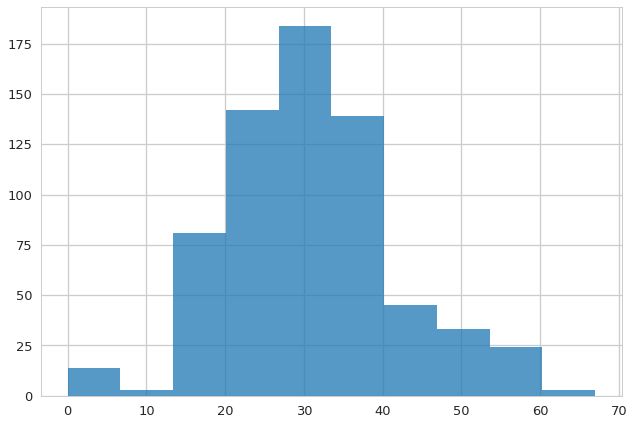

In [5]:
df["totalDocks"].hist(alpha=0.75)

And a histogram of the available bikes across bike stations (real-time):

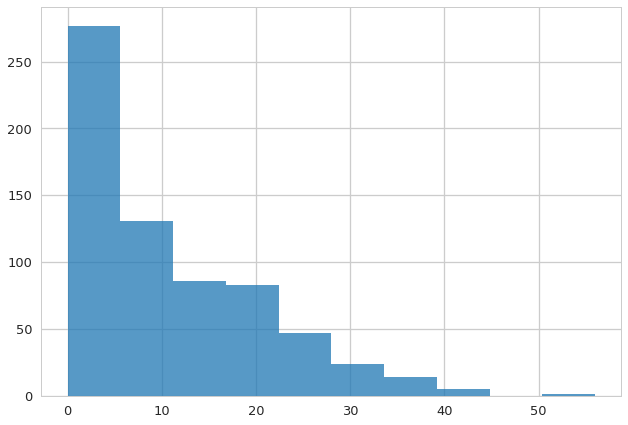

In [6]:
df["availableBikes"].hist(alpha=0.75)

Let's create a variable that shows how full is each station.

In [7]:
df["perc_full"] = df['availableBikes']/df['totalDocks']

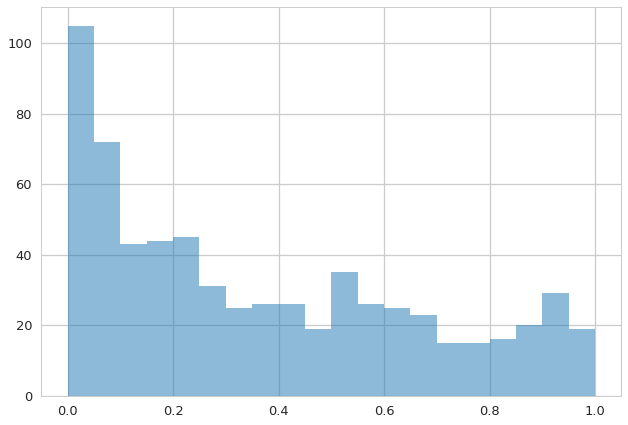

In [8]:
df["perc_full"].hist(alpha=0.5, bins=20)

#### Poor man's mapping

We will now do a small attempt at using a scatterplot, together with the longitude and latitude coordinates to plot things in a map.

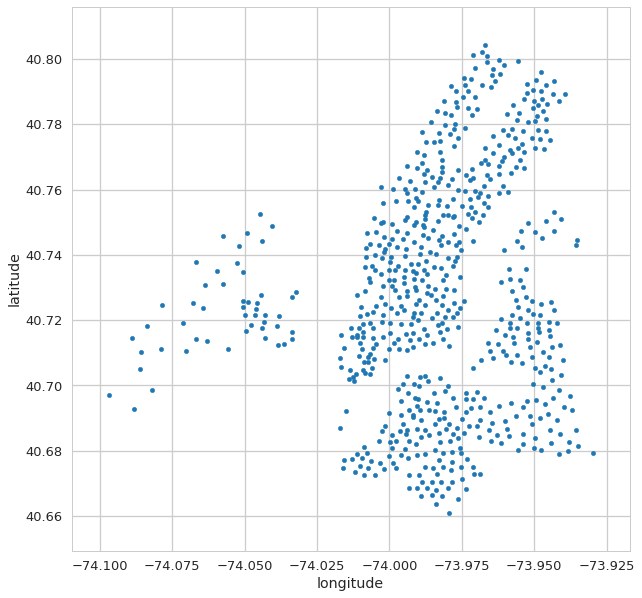

In [23]:
df.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude',
    figsize = (10,10)
)

### Using multiple visual channels for plotting

We used the x and y axes in the plot to show the locations of the stations. 

When we visualize data, we can use multiple visual channels to communicate information. For example, we can use the size of the dot to communicate how full each station is.

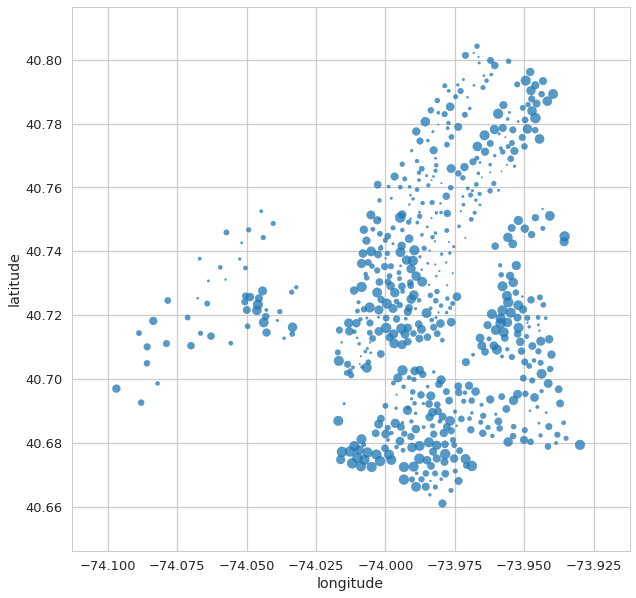

In [32]:
# The s parameter controls the size of the market. We make the size proportional to the perc_full column
df.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    s = 100*df['perc_full'], alpha=0.75,
    figsize = (10,10)
)

### Using GeoPandas to plot map outlines

We can use GeoPandas to also plot the map underneath the "map" that we created above. For that, we will need to install the geopandas package:

In [11]:
!sudo pip3 install -U geopandas fiona shapely pyproj geopy pysal descartes

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
Requirement already up-to-date: geopandas in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: fiona in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: shapely in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: pyproj in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: geopy in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: pysal in /usr/local/lib/python3.5/dist-packages
Requirement already 

In [12]:
!sudo apt-get install -y libgeos-dev python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.5.0-1ubuntu2).
python3-rtree is already the newest version (0.8.2+ds-2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [13]:
import geopandas as gpd

To draw the maps, we need the corresponding **shapefile** that describes the shapes of the areas that we want to plot. For our example, we will use the shapefile of the NYC neighborhoods that is available from the NYC Open Data repository.

In [14]:
# Dataset from NYC Open Data: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
!curl 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON' -o data/nyc-neighborhoods.geojson

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4070k    0 4070k    0     0  4481k      0 --:--:-- --:--:-- --:--:-- 4477k


We use the shapefile that we downloaded (which is in _GeoJSON_ format) and we create a "geo-dataframe".

In [15]:
df_nyc = gpd.GeoDataFrame.from_file('data/nyc-neighborhoods.geojson')

We can plot the geo information, using our usual syntax.

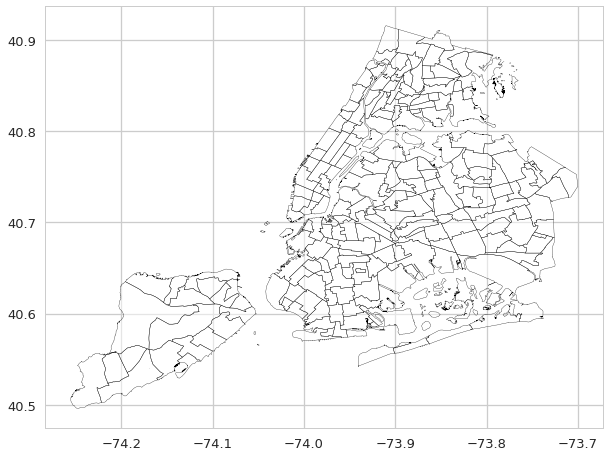

In [25]:
base = df_nyc.plot(linewidth=0.3, color='white', figsize = (10,10))

### Combining plots

We can combine plots by using the `ax` parameter, and pass one plot as parameter to the other. Below, we create the `base` plot, with the neighborhood outlines, and then we pass `base` as the `ax` parameter to the plot that draws the Citibike stations.

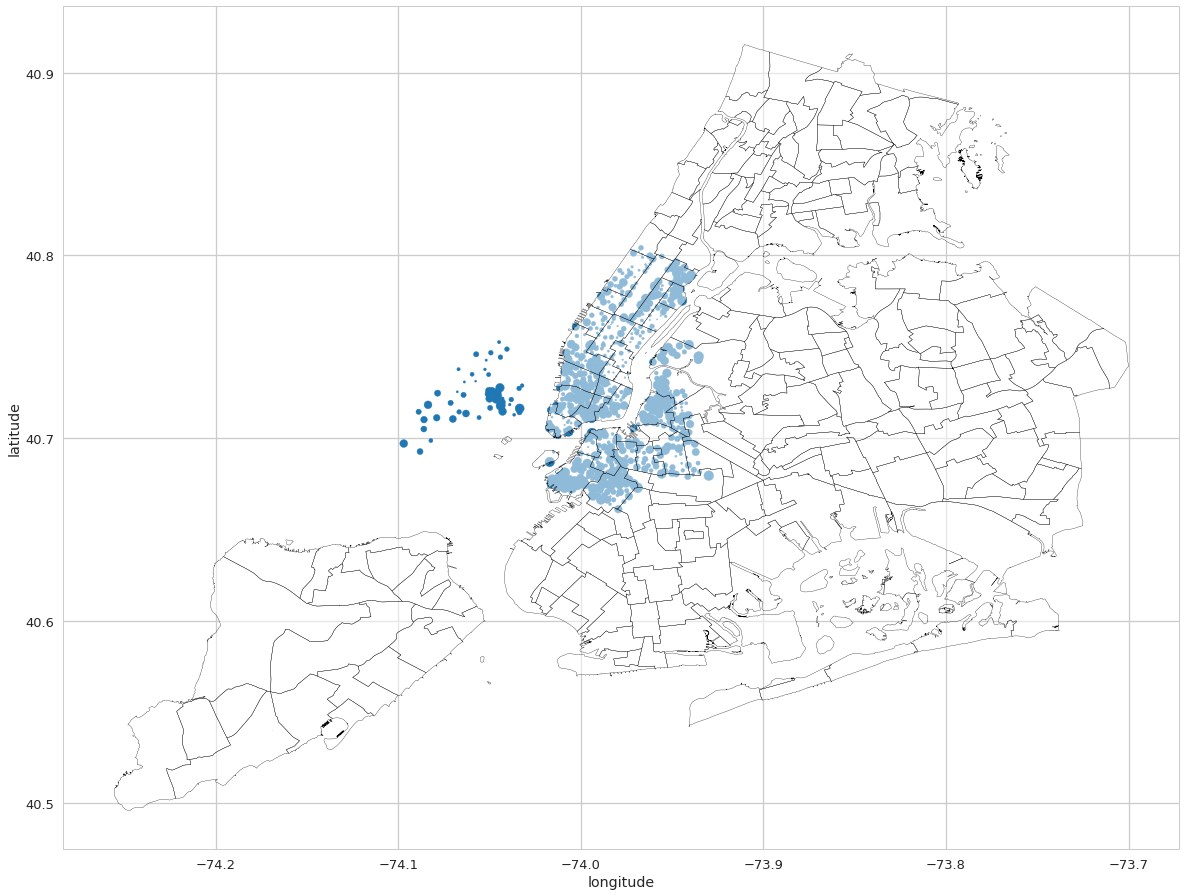

In [26]:
base = df_nyc.plot(linewidth=0.3, color='white', figsize = (20,20))

df.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    s = 100*df['perc_full'],
    ax = base
)

#### Beautification

* Lets reduce the x- and y- range to focus on the areas for which we have data. We use the `set_xlim` and `set_ylim` for that purpose.
* We will use the `zorder` parameter to define which plot goes to the top, which to the bottom, etc. The element with the lowest zorder goes to the bottom, and the one with the highest zorder on top.

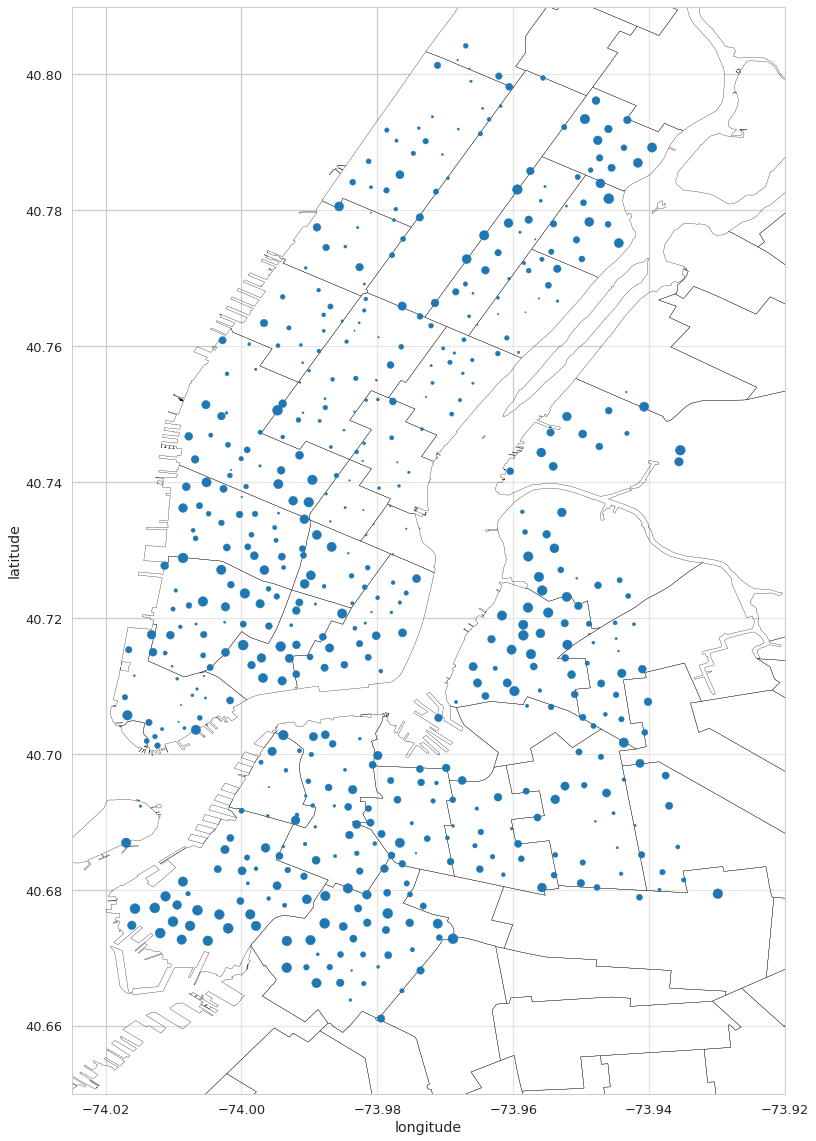

In [27]:
base = df_nyc.plot(linewidth=0.3, color='white', zorder=1, figsize = (20,20))
base.set_xlim( (-74.025,-73.92)  )
base.set_ylim( (40.65  , 40.81) )
df.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    s = 100*df['perc_full'],
    ax = base, zorder=2
)

#### Adding more communication channels

Earlier, we used the size of the marker to communicate how full each station is. Now, we will use a different type of a market, and a different color, to show stations that are out of service.

In [19]:
inservice = df[df["statusValue"] == 'In Service']
outofservice = df[df["statusValue"] == 'Not In Service']

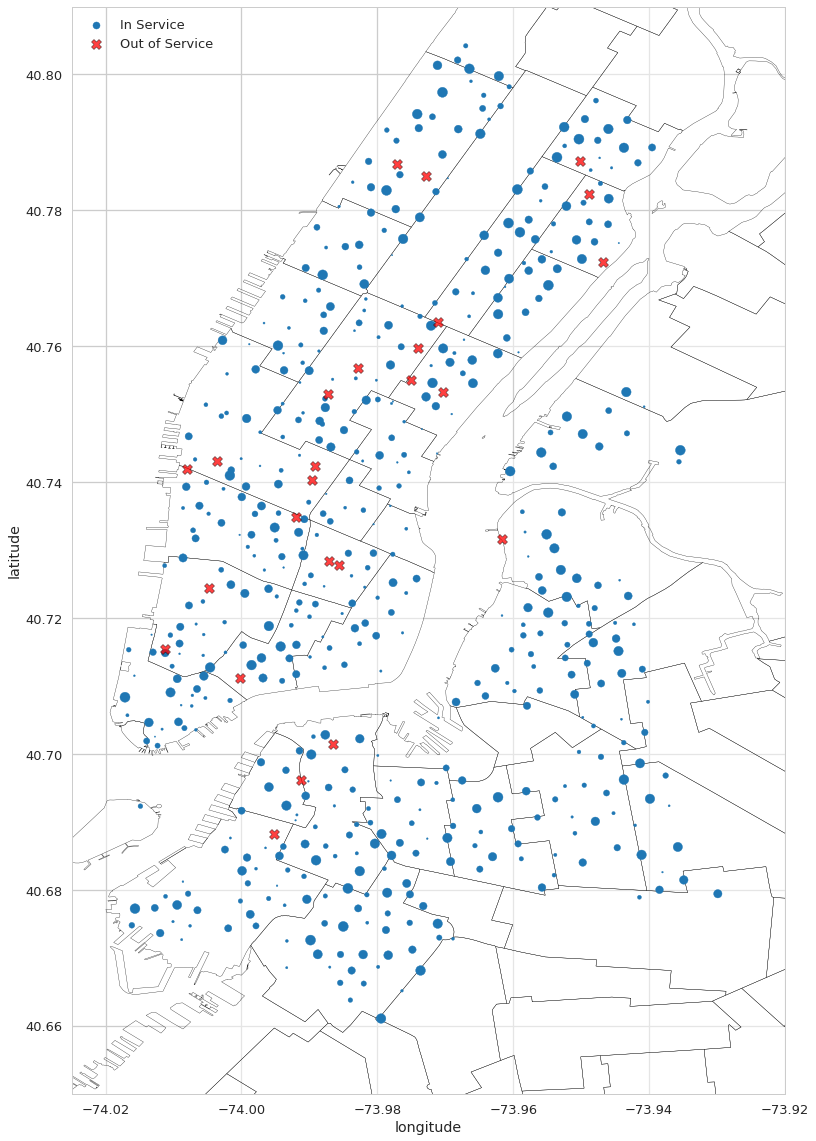

In [28]:
# Plot the map
base = df_nyc.plot(linewidth=0.3, color='white', zorder=1, figsize = (20,20))
base.set_xlim( (-74.025,-73.92)  )
base.set_ylim( (40.65  , 40.81) )
# Plot the in-service stations, and make the size of each station proportional to its fullness
inservice.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    s = 100*df['perc_full'],
    ax = base, zorder=2, 
    label = 'In Service'
)
# Plos the out-of-service stations with a red x mark
outofservice.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    edgecolor = 'Black', linewidth=0.5,
    color='Red', marker = 'X',
    s = 100, alpha = 0.75, 
    ax = base, 
    label = 'Out of Service', zorder=3)

#### More advanced

The part below tries to add even more communication channels. We change the size of the circle to correspond to the size of the station, and then we use the color transparency to show how full (or empty) the station is. Unfortunately, due to limitations of Pandas, we cannot set directly the transparency of each data point, so we need to go and do the plotting directly using matplotlib functions. In that case, we set the color of each bubble directly.

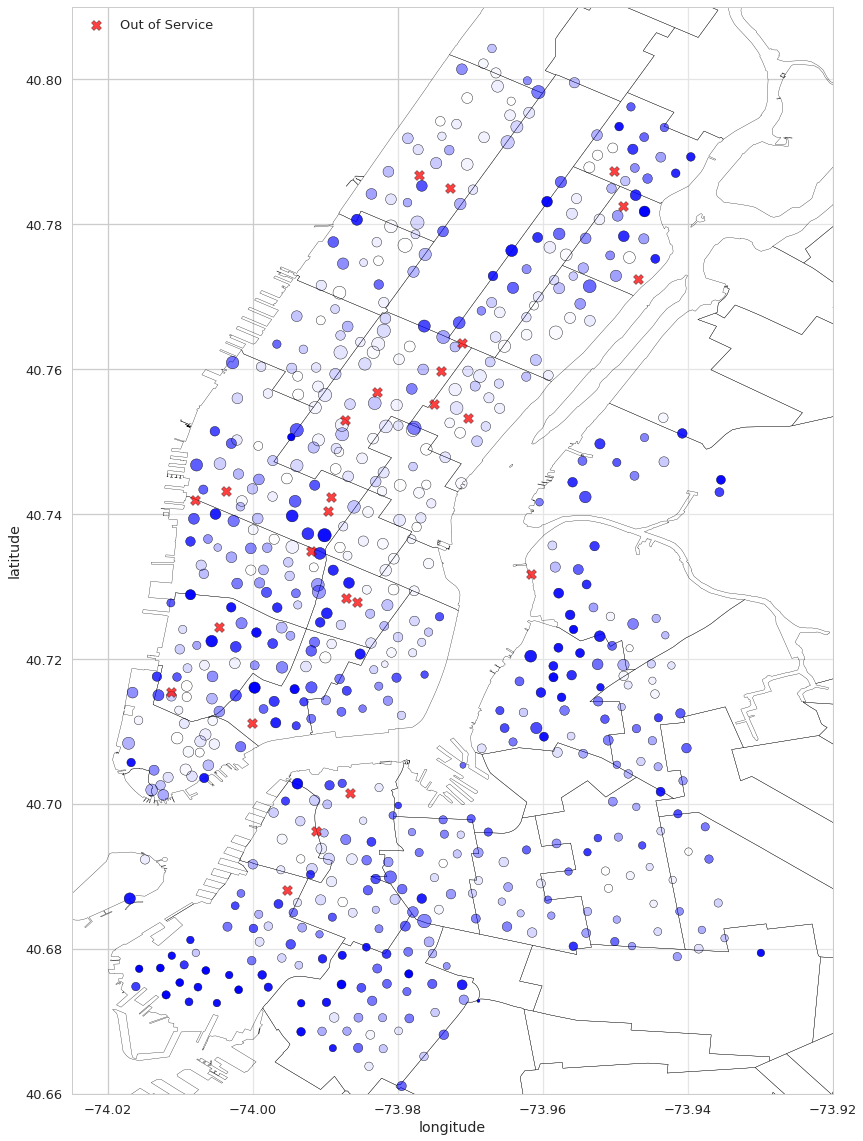

In [30]:
import numpy as np
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.set_xlim( (-74.025,-73.92)  )
ax.set_ylim( (40.66  , 40.81) )

# And now make the size of each point proportional to the size of available bikes
# using the s option in the plot
inservice = df[df["statusValue"] == 'In Service']
outofservice = df[df["statusValue"] == 'Not In Service']

df_nyc.plot(linewidth=0.3, color='White',ax=ax, alpha = 0.5, zorder=1)

# Following http://stackoverflow.com/questions/26738881/setting-scatter-points-transparency-from-data-array-in-matplotlib-plot
# to set alpha in varying degrees
plt.scatter( 
    x=inservice['longitude'],
    y=inservice['latitude'],
    color=np.asarray([(0, 0, 1, a) for a in inservice['perc_full']]), 
    edgecolors='Black', 
    label='In Service',
    s=3*inservice['totalDocks'], 
    zorder=2
)
outofservice.plot(figsize = (20,20),
    kind='scatter',
    ax = ax, 
    x='longitude',
    y='latitude',
    edgecolor = 'Black', color='Red', marker = 'X',
    s = 100, alpha = 0.75,
    label = 'Out of Service', 
    zorder=3
)